# Linear Regression using PyTorch

**[Faisal Z. Qureshi](http://vclab.science.uoit.ca)**  

- Dataset
- Built-in linear layer
- Built-in cost

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

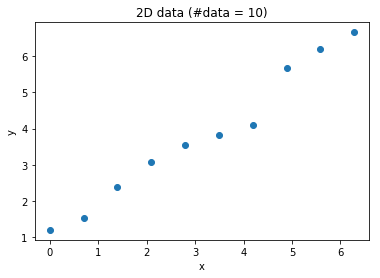

In [2]:
N = 10 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [3]:
import torch

## Dataset

In [4]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([self.x[idx]]), 
            'label': torch.tensor([self.y[idx]])}
        return sample

In [5]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([0.]) tensor([1.2025])
1 tensor([0.6981]) tensor([1.5332])
2 tensor([1.3963]) tensor([2.3872])
3 tensor([2.0944]) tensor([3.0870])
4 tensor([2.7925]) tensor([3.5528])
5 tensor([3.4907]) tensor([3.8255])
6 tensor([4.1888]) tensor([4.0942])
7 tensor([4.8869]) tensor([5.6697])
8 tensor([5.5851]) tensor([6.2013])
9 tensor([6.2832]) tensor([6.6555])


## Dataloader

In [6]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [7]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[3.4907],
        [4.8869],
        [6.2832],
        [1.3963]]),
 'label': tensor([[3.8255],
        [5.6697],
        [6.6555],
        [2.3872]])}

batch# = 1
samples: 
{'feature': tensor([[4.1888],
        [2.0944],
        [0.0000],
        [2.7925]]),
 'label': tensor([[4.0942],
        [3.0870],
        [1.2025],
        [3.5528]])}

batch# = 2
samples: 
{'feature': tensor([[0.6981],
        [5.5851]]),
 'label': tensor([[1.5332],
        [6.2013]])}


## Model

In [8]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

### Setting a model for our problem

In [9]:
input_dim = 1
output_dim = 1

model = MyModel(input_dim, output_dim)

## Cost function

Often called loss or error

In [10]:
cost = nn.MSELoss()

## Minimizing the cost function

In other words training (or learning from data)

In [11]:
num_epochs = 10  # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        
        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimiser.zero_grad()
        
        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        error.backward()
        
        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 12.885244369506836
	Batch = 1, Error = 5.077721118927002
	Batch = 2, Error = 15.32325553894043
Epoch = 1
	Batch = 0, Error = 1.0023999214172363
	Batch = 1, Error = 0.726385235786438
	Batch = 2, Error = 0.043172456324100494
Epoch = 2
	Batch = 0, Error = 0.4491015076637268
	Batch = 1, Error = 0.44997507333755493
	Batch = 2, Error = 0.11377965658903122
Epoch = 3
	Batch = 0, Error = 0.3028799295425415
	Batch = 1, Error = 0.18087443709373474
	Batch = 2, Error = 0.5257319808006287
Epoch = 4
	Batch = 0, Error = 0.2809544503688812
	Batch = 1, Error = 0.2644607424736023
	Batch = 2, Error = 0.23514369130134583
Epoch = 5
	Batch = 0, Error = 0.3298056125640869
	Batch = 1, Error = 0.1382095366716385
	Batch = 2, Error = 0.3576323688030243
Epoch = 6
	Batch = 0, Error = 0.21077977120876312
	Batch = 1, Error = 0.3373437821865082
	Batch = 2, Error = 0.13173562288284302
Epoch = 7
	Batch = 0, Error = 0.24302546679973602
	Batch = 1, Error = 0.33212924003601074
	Batch = 2, Erro

## Lets see how well the model has learnt the data

In [12]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(x_for_plotting.T, dtype=torch.float32)
y_for_plotting = model.forward(design_matrix.unsqueeze(1))
print('y_for_plotting shape:', y_for_plotting.shape)

y_for_plotting shape: torch.Size([1000, 1])


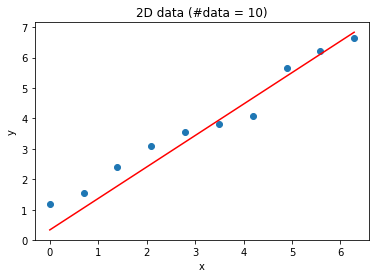

In [13]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()